In [65]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0) # set default size of plots


(-1, 1)

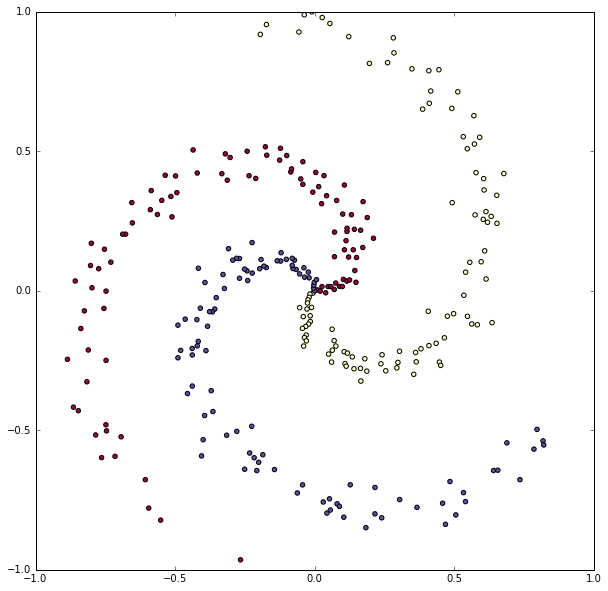

In [66]:
N = 100
D = 2
K = 3
# examples x dimension
X = np.zeros((N*K, D))
# example
y = np.zeros(N*K, dtype='uint8')

for j in range(K):
    ix = range(N * j, N * (j + 1))
    r = np.linspace(0.0, 1, N)
    t = np.linspace(j * 4, (j + 1) * 4, N) + np.random.randn(N) * 0.2
    X[ix] = np.c_[r * np.cos(t), r * np.sin(t)] 
    y[ix] = j

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.xlim(-1, 1)
plt.ylim(-1, 1)

In [67]:
# Train a linear classifier

W = 0.01 * np.random.randn(D, K)
b = np.zeros((1,K))

step_size = 1e-0
reg = 1e-3 
num_examples = X.shape[0]

for i in range(200):
    scores = X.dot(W) + b
    
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    correct_logprobs = -np.log(probs[range(N * K), y])
    data_loss = np.sum(correct_logprobs) / (N * K)
    reg_loss = 0.5 * 0 * np.sum(W * W)
    loss = data_loss + reg_loss

    if i % 10 == 0:
        print "iteration %d: loss %f" % (i, loss)
        
    dscores = probs
    dscores[range(num_examples), y] -= 1
    dscores /= num_examples
    
    dW = X.T.dot(dscores)
    db = np.sum(dscores, axis=0, keepdims=True)
    dW += reg * W
    
    W += -step_size * dW
    b += -step_size * db
    

iteration 0: loss 1.097213
iteration 10: loss 0.905699
iteration 20: loss 0.833532
iteration 30: loss 0.800081
iteration 40: loss 0.782202
iteration 50: loss 0.771690
iteration 60: loss 0.765080
iteration 70: loss 0.760714
iteration 80: loss 0.757717
iteration 90: loss 0.755597
iteration 100: loss 0.754059
iteration 110: loss 0.752921
iteration 120: loss 0.752062
iteration 130: loss 0.751405
iteration 140: loss 0.750895
iteration 150: loss 0.750494
iteration 160: loss 0.750176
iteration 170: loss 0.749921
iteration 180: loss 0.749715
iteration 190: loss 0.749547


In [68]:
scores = X.dot(W)
predicted_class = np.argmax(scores, axis=1)
print 'training accuuracy: %.2f' % (np.mean(predicted_class == y))

training accuuracy: 0.49


In [70]:
h = 100
W = 0.01 * np.random.randn(D, h)
b = np.zeros((1, h))
W2 = 0.01 * np.random.randn(h, K)
b2 = np.zeros((1, K))

stepsize = 1e-0
reg = 1e-3
num_examples = X.shape[0]
for i in range(int(1e4)):
    
    hidden = X.dot(W) + b
    hidden = np.maximum(0, hidden)
    scores = hidden.dot(W2) + b2
    
    scaled_scores = scores - np.max(scores, axis=1, keepdims=True)
    exp_scores = np.exp(scaled_scores)

    #exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    
    correct_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(correct_logprobs) / num_examples
    reg_loss = 0.5 * reg * np.sum(W * W) + 0.5 * reg * np.sum(W2 * W2)
    loss = data_loss + reg_loss
    
    if i % int(1e3) == 0:
        print "Iteration: %d loss: %f" % (i, loss)
        
    dscores = probs
    dscores[range(num_examples), y] -= 1
    dscores /= num_examples
    
    # backprop into W2 and B2
    dW2 = hidden.T.dot(dscores)
    db2 = np.sum(dscores, axis=0, keepdims=True)
    
    # backprop to hidden
    dhidden = dscores.dot(W2.T)
    
    # ReLU
    dhidden[hidden <= 0] = 0
    
    # W, b
    dW = X.T.dot(dhidden)
    db = np.sum(dhidden, axis=0, keepdims=True)
    
    # reg gradient
    dW2 += reg * W2
    dW += reg * W
    
    W += -step_size * dW
    b += -step_size * db
    W2 += -step_size * dW2
    b2 += -step_size * db2
      

Iteration: 0 loss: 1.098517
Iteration: 1000 loss: 0.323611
Iteration: 2000 loss: 0.284281
Iteration: 3000 loss: 0.257703
Iteration: 4000 loss: 0.252587
Iteration: 5000 loss: 0.252572
Iteration: 6000 loss: 0.250820
Iteration: 7000 loss: 0.251387
Iteration: 8000 loss: 0.249865
Iteration: 9000 loss: 0.250619


In [62]:
# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print 'training accuracy: %.2f' % (np.mean(predicted_class == y))

training accuracy: 0.99
